In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats
from IPython import display
import time
from matplotlib.patches import Rectangle
from sklearn.linear_model import LinearRegression
%matplotlib inline

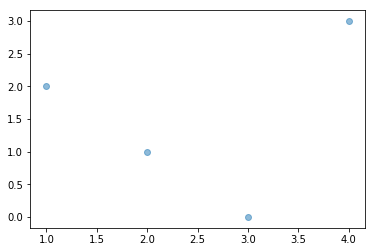

In [56]:
f = lambda x : -x + 3 #+ 50*np.random.normal(0,1,1)

x = np.array([1.0,2.0,3.0,4.0])
y = [f(i) for i in x]
y[-1] = y[-1] + 4
y = np.array(y)

bias = np.ones(4)
X = np.vstack((bias,x)).T

x = x.reshape((4,1))
y = y.reshape((4,1))
plt.scatter(x,y,alpha=0.5)
plt.show()

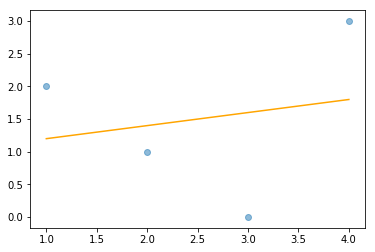

In [61]:
lm = LinearRegression()
lm.fit(x,y)

plt.scatter(x, y, alpha = 0.5)
plt.plot(x, lm.predict(x), color = "orange")

plt.show()

In [69]:
def regression(X, y):
    pseudoinv = np.linalg.pinv(np.dot(X.T,X))
    a = np.dot(np.dot(pseudoinv,X.T),y)
    return a

def generate_probabilities(X,y,a):
    errors = np.zeros(len(X))
    for idx,xi in enumerate(X):
        errors[idx] = (y[idx]- np.dot(xi,a))**2
    errors/sum(errors)

def sampled_regression(sampling, X, y, a, I, r):
    """
    arguments :
        sampling: 'uniform' or 'importance'
        X, y, a
        I: Iterations
        r: row sample size
        
        call example:
        sampled_regression(sampling='importance',X=X, y=y, a=a, I=10, r=10)
    """
    
    sample_errs = []
    min_err = float('inf')
    best_model = None
    best_line = a[1]*x + a[0] 
    probs = None
    
    for i in range(I):
        plt.scatter(x, y, alpha = 0.4, s = 50)
        plt.plot(x,best_line,color='orange',alpha=0.5)
        if sampling.lower() == 'importance':
            idx = np.random.choice(range(len(X)), r, probs)
        else: # uniform
            idx = np.random.randint(len(X),size=r)
        X1 = X[idx,:]
        y1 = y[idx]
        if probs:
            y1 = y1*probs[idx]
        a1 = regression(X1,y1)
        err = np.linalg.norm(y - np.dot(X, a1))/len(X)
        
        sample_errs.append(err)
        if err < min_err:
            best_model = a1
            min_err = err
        probs = generate_probabilities(X,y,best_model)
            
        #plotting stuff
        plt.title("Pupulation Error: "+str(population_err))
        pylab.xlim([0,5])
        pylab.ylim([-1,5])
        plt.scatter(X1[:,1],y1,color="red", s = 30)
        extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
        plt.legend([extra],['sample error: '+str(err)])
        x1 = X1[:,1]
        line1 = a1[0] + x*a1[1]
        plt.plot(x,line1,color='red')
        display.clear_output(wait=True)
        display.display(plt.gcf())
    
        time.sleep(2)
        plt.clf()
    return sample_errs

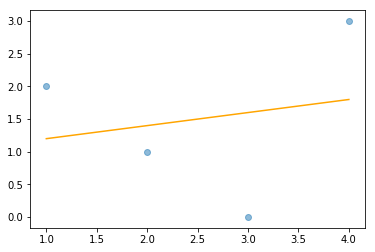

In [65]:
a = regression(X,y)
best_line = a[1]*x + a[0] 
plt.scatter(x,y,alpha=0.5)
plt.plot(x, line, color="orange")
population_err = np.linalg.norm(y - np.dot(X,a))/len(X)

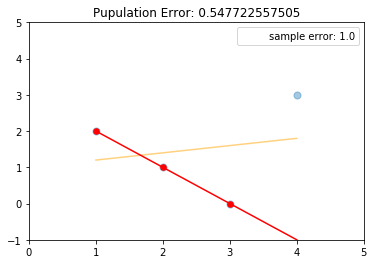

In [70]:
r = 3
I = 5
imp_err = sampled_regression('uniform', X,y,a,I,r)

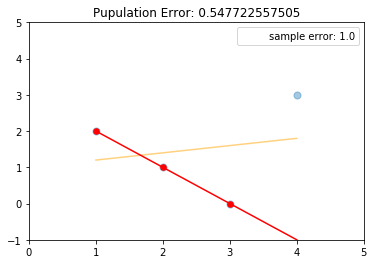

In [71]:
imp_err = sampled_regression('importance', X,y,a,I,r)